## Implementation of a simple RNN

In [1]:
import numpy as np

timesteps = 100 # Number of steps in the input sequence
input_features = 32 # Dimensionality of the input feature space
output_features = 64 # Dimensionality of the output feature space

In [2]:
inputs = np.random.random((timesteps, input_features)) # Input data: random noise for the sake of the example

state_t = np.zeros((output_features,)) # Initial state: an all zero vector

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    successive_outputs.append(output_t)
    
    state_t = output_t
    
final_output_sequence = np.concatenate(successive_outputs, axis=0)

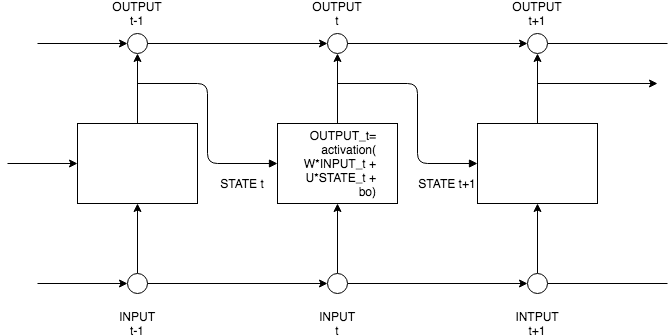

In [3]:
from keras.layers import SimpleRNN

Using TensorFlow backend.


Returns only the output at the last timestep

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Full state sequence

In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Stack several recurrent layers one after the other

In [6]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) # Last layer only returns the last output
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## Run simple RNN on IMDB movie classification problem

In [7]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [8]:
max_features = 10000
maxlen = 500 # Number of words to consider as features
batch_size = 32 # Cuts off texts after this many words (among the max_features most common words)

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [9]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Training the model with Embedding and SimpleRNN layers

In [10]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10,
                   batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.6433 - acc: 0.6139 - val_loss: 0.4709 - val_acc: 0.7982
Epoch 2/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.4115 - acc: 0.8223 - val_loss: 0.4497 - val_acc: 0.8124
Epoch 3/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.2969 - acc: 0.8810 - val_loss: 0.3763 - val_acc: 0.8340
Epoch 4/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.2138 - acc: 0.9175 - val_loss: 0.3899 - val_acc: 0.8398
Epoch 5/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.1697 - acc: 0.9379 - val_loss: 0.3563 - val_acc: 0.8672
Epoch 6/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.1166 - acc: 0.9591 - val_loss: 0.3858 - val_acc: 0.8602
Epoch 7/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.0801 - acc: 0.9730 - val_loss: 0.5782 - val_acc:

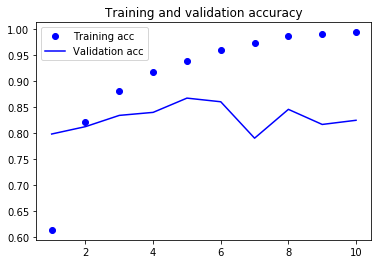

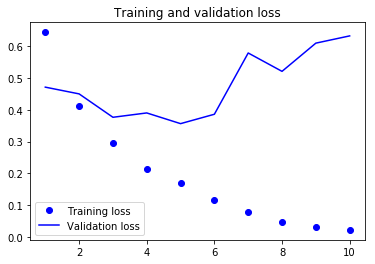

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()